<a href="https://colab.research.google.com/github/Mach-web/Machine_learning/blob/master/Climate_Data_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [95]:
!pip install patool
!pip install netCDF4
!pip install rasterio

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
import os
keras = tf.keras
%matplotlib inline

In [ ]:
tf.__version__

'2.15.0'

### Give google colab access to your google account

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
# os.listdir('/content/drive/MyDrive')

### Install patool to unzip the dataset

In [ ]:
import patoolib
patoolib.extract_archive('/content/drive/MyDrive/KMD Datasets- UON AAAP-20240319T150214Z-001.zip')

INFO patool: Extracting /content/drive/MyDrive/KMD Datasets- UON AAAP-20240319T150214Z-001.zip ...
INFO:patool:Extracting /content/drive/MyDrive/KMD Datasets- UON AAAP-20240319T150214Z-001.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_xkgyek3d -- "/content/drive/MyDrive/KMD Datasets- UON AAAP-20240319T150214Z-001.zip"
INFO:patool:running /usr/bin/7z x -o./Unpack_xkgyek3d -- "/content/drive/MyDrive/KMD Datasets- UON AAAP-20240319T150214Z-001.zip"
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/KMD Datasets- UON AAAP-20240319T150214Z-001.zip extracted to `KMD Datasets- UON AAAP-20240319T150214Z-0011' (local file exists).
INFO:patool:... /content/drive/MyDrive/KMD Datasets- UON AAAP-20240319T150214Z-001.zip extracted to `KMD Datasets- UON AAAP-20240319T150214Z-0011' (local file exists).


'KMD Datasets- UON AAAP-20240319T150214Z-0011'

In [ ]:
project_path = 'KMD Datasets- UON AAAP-20240319T150214Z-001/Apen Softwares - UON AAAP'
os.listdir(project_path)

['Datasets', 'Climate Datasets.pdf', 'Climate Datasets.docx']

### Understanding the data

In [ ]:
data_path = os.path.join(project_path, 'Datasets')
os.listdir(data_path)

['Trend',
 'County gridded tmin.xlsx',
 'County gridded tmax.xlsx',
 'Gridded rainfall.xlsx',
 'Storm_Rainfall',
 'SPEI',
 'MET STATIONS.xlsx']

In [99]:

trend_path = data_path + '/Trend/Outputs'
storm_path = data_path + '/Storm_Rainfall'
spei_path = data_path + '/SPEI'
print(f"{len(os.listdir(trend_path))} files in Trend folder: {os.listdir(trend_path)}")
print(f"{len(os.listdir(storm_path))} files in Storm Rainfall folder: {os.listdir(storm_path)}")
print(f"{len(os.listdir(spei_path))} files in SPEI folder: {os.listdir(spei_path)}")

21 files in Trend folder: ['Trend-change over 1991-2022 jan-dec-Tmin.png', 'trend_OND-seasonal-rain-percent-change-over-1991-2020_10-12.nc', 'Trend-change in percent 1991-2022 jan-dec-Tmean.png', 'Trend-change over 1991-2022-MAM.png', 'Trend-change in percent 1991-2022 jan-dec-Tmin.png', 'trend_annual-rain-percentage_change_over-1991-2020.nc', 'Trend-change over 1991-2022-OND.png', 'Trend-change over the period 1991-2022 jan-dec-RAIN.png', 'trend_annual-Tmax_change-over-1991-2020.nc', 'trend_MAM-seasonal-rain-percent-change-over-1991-2020_03-05.nc', 'Trend-change in percent 1991-2022-MAM.png', 'Trend-change over 1991-2022 jan-dec-Tmax.png', 'trend_annual-Tmin_change-over-1991-2020.nc', 'Trend-change in percent 1991-2022 jan-dec-Tmax.png', 'trend_annual-rain-change-over-1991-2020.nc', 'trend_annual-Tmin_percentage_change-over 1991-2020.nc', 'trend_annual-Tmax_percentage_change-over-1991-2020.nc', 'trend_MAM-seasonal-rain-change-over-1991-2020_03-05.nc', 'trend_OND-seasonal-rain-change-o

#### Visualize images and trends in Trend folder

In [101]:
import glob

def visualize_png(folder_name):
    return glob.glob(os.path.join(folder_name, "*.png"))
len(visualize_png(trend_path))

11

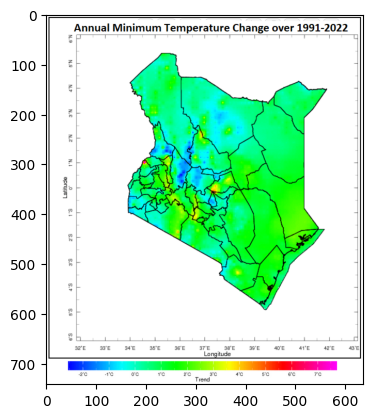

In [ ]:
im = img.imread(data_path + '/Trend/Outputs/Trend-change over 1991-2022 jan-dec-Tmin.png')
plt.imshow(im)
plt.show()

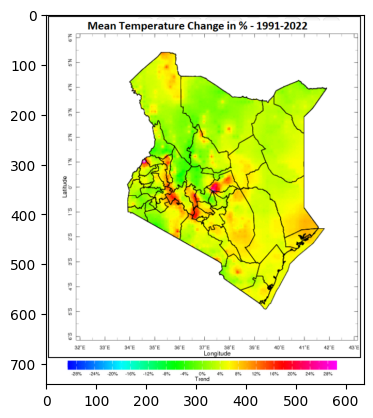

In [ ]:
im = img.imread(data_path + '/Trend/Outputs/Trend-change in percent 1991-2022 jan-dec-Tmean.png')
plt.imshow(im)
plt.show()

In [ ]:
import netCDF4 as nc
nc_file_path = data_path + '/Trend/Outputs/trend_OND-seasonal-rain-percent-change-over-1991-2020_10-12.nc'
rain_change = nc.Dataset(nc_file_path)
# print metadata as dictionary
print(rain_change)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): Lon(111), Lat(120)
    variables(dimensions): float64 Lon(Lon), float64 Lat(Lat), float32 trend(Lat, Lon), float32 std.slope(Lat, Lon), float32 pvalue(Lat, Lon), float32 r2(Lat, Lon), float32 nonNA(Lat, Lon)
    groups: 


#### Visualize some tiff images in storm rainfall

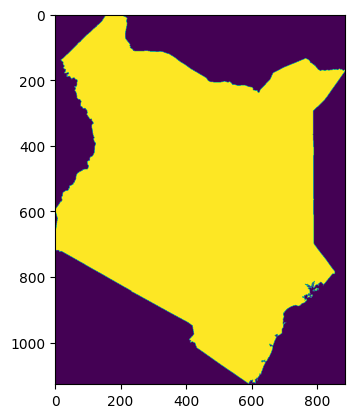

In [92]:
from PIL import Image
import rasterio
from rasterio.plot import show

def open_tiff(data_path):
    with rasterio.open(data_path) as image:
        image_array = image.read()
    show(image_array)
open_tiff(data_path + '/Storm_Rainfall/RR_d24hrT10.tif')

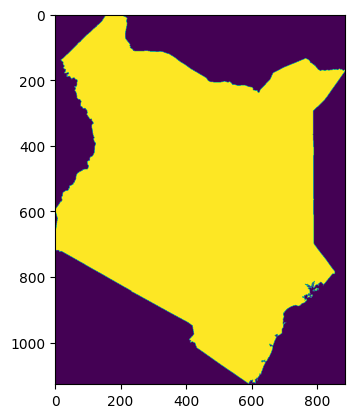

In [94]:
open_tiff(data_path + '/Storm_Rainfall/RR_d18hrT10.tif')

### Read the excel files

In [ ]:
county_gridded_tmin = pd.read_excel(data_path + '/County gridded tmin.xlsx')
county_gridded_tmin.tail(4)

,ID,Baringo,Bomet,Bungoma,Busia,ElgeyoMarakwet,Embu,Garissa,HomaBay,Isiolo,...,Samburu,Siaya,TaitaTaveta,TanaRiver,TransNzoia,Turkana,UasinGishu,Vihiga,Wajir,WestPokot
10590,20181228,12.708,11.804,12.069,15.173,12.044,15.916,22.910,18.296,22.190,...,17.089,17.201,19.102,21.940,10.447,21.986,10.860,14.373,23.570,15.583
10591,20181229,12.674,12.121,13.166,16.552,12.502,15.540,22.964,18.855,22.076,...,16.790,18.163,18.868,21.721,11.253,22.023,11.425,15.084,24.096,16.138
10592,20181230,13.126,11.842,12.740,15.746,12.452,17.446,23.483,18.318,22.518,...,17.567,17.522,20.274,22.634,11.021,24.564,11.236,14.714,23.574,16.834
10593,20181231,13.037,11.938,12.890,15.978,12.424,17.942,23.972,17.243,23.856,...,19.584,16.965,20.450,23.089,11.085,24.360,11.229,14.594,23.264,16.739


In [ ]:
county_gridded_tmax = pd.read_excel(data_path + '/County gridded tmax.xlsx')
county_gridded_tmax.tail(4)

,ID,Baringo,Bomet,Bungoma,Busia,ElgeyoMarakwet,Embu,Garissa,HomaBay,Isiolo,...,Samburu,Siaya,TaitaTaveta,TanaRiver,TransNzoia,Turkana,UasinGishu,Vihiga,Wajir,WestPokot
10590,20181228,30.702,26.404,28.035,30.569,27.032,27.495,34.520,29.714,33.874,...,30.433,30.228,32.212,33.866,27.473,35.884,25.936,28.951,35.062,31.666
10591,20181229,30.551,26.282,27.885,30.738,26.690,27.951,35.150,29.252,34.645,...,30.813,30.146,32.742,34.344,26.967,35.525,25.714,28.985,36.294,31.069
10592,20181230,30.754,26.129,25.336,26.270,26.692,27.929,35.086,28.276,34.019,...,30.368,27.769,32.658,34.394,26.002,34.340,25.481,28.040,35.186,30.308
10593,20181231,30.962,26.157,28.183,30.459,27.262,26.697,34.235,29.002,32.972,...,29.595,29.810,31.642,33.611,27.676,35.082,26.133,28.795,34.395,31.527


In [ ]:
gridded_rainfall = pd.read_excel(data_path + '/Gridded rainfall.xlsx')
gridded_rainfall.tail(4)

,ID,Baringo,Bomet,Bungoma,Busia,ElgeyoMarakwet,Embu,Garissa,HomaBay,Isiolo,...,Samburu,Siaya,TaitaTaveta,TanaRiver,TransNzoia,Turkana,UasinGishu,Vihiga,Wajir,WestPokot
10590,20181228,1.151,3.118,0.744,1.274,0.437,1.568,0.191,5.773,0.881,...,0.820,3.317,0.023,0.157,0.230,0.058,0.570,9.768,1.233,0.099
10591,20181229,0.754,1.407,1.778,2.584,1.993,3.467,0.962,5.032,0.655,...,1.192,8.572,0.062,0.505,0.990,1.578,1.190,21.619,1.095,1.878
10592,20181230,0.804,1.615,0.308,0.264,0.395,2.045,0.306,1.274,1.436,...,1.893,0.160,0.194,0.292,0.061,0.713,0.047,0.279,0.513,0.136
10593,20181231,0.005,0.025,0.022,0.090,0.000,0.066,0.431,0.264,0.016,...,0.199,0.003,5.072,1.644,0.000,0.001,0.001,0.420,1.045,0.024


In [ ]:
met_stations = pd.read_excel(data_path + '/MET STATIONS.xlsx')
met_stations.tail(4)

,id,aviationid,wmoid,rainfall_begindate,rainfall_enddate,begindate,enddate,name,district,country,...,drainagebasin,deglatitude,minlatitude,seclatitude,nslatitude,deglongitude,minlongitude,seclongitude,ewlongitude,elevation
31,9339036,63797.0,HKMT,1959,NaN,NaN,NaN,MTWAPA AGROMET STATION,KILIFI,KENYA,...,3M,3,56,NaN,S,39,44,NaN,E,21
32,9340007,63798.0,HKMH,1956,NaN,NaN,NaN,MSABAHA AGROMET STATION,KILIFI,KENYA,...,3H,3,16,NaN,S,40,3,NaN,E,91
33,9340009,63799.0,HKML,1961,NaN,NaN,NaN,MALINDI METEOROLOGICAL STATION,KILIFI,KENYA,...,3M,3,14,NaN,S,40,6,NaN,E,20
34,9439021,63820.0,HKMO,1946,NaN,NaN,NaN,MOI INTERNATIONAL AIRPORT - MOMBASA,MOMBASA,KENYA,...,3M,4,2,NaN,S,39,37,NaN,E,5
